Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraud Cases: 0.1727%


c:\Users\Shravya H Jain\Desktop\classification\wisework_assignment\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.51      0.68     56864
           1       0.00      0.96      0.01        98

    accuracy                           0.51     56962
   macro avg       0.50      0.74      0.34     56962
weighted avg       1.00      0.51      0.68     56962


Confusion Matrix:
 [[29141 27723]
 [    4    94]]

ROC AUC Score: 0.9438
Average Precision Score: 0.5441


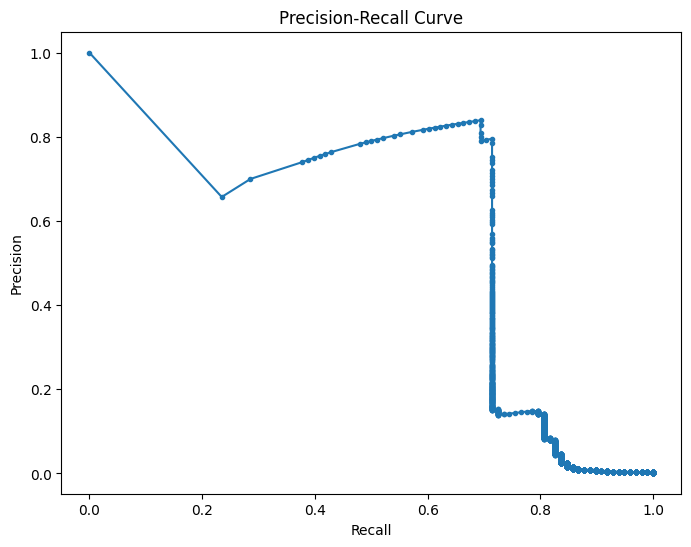

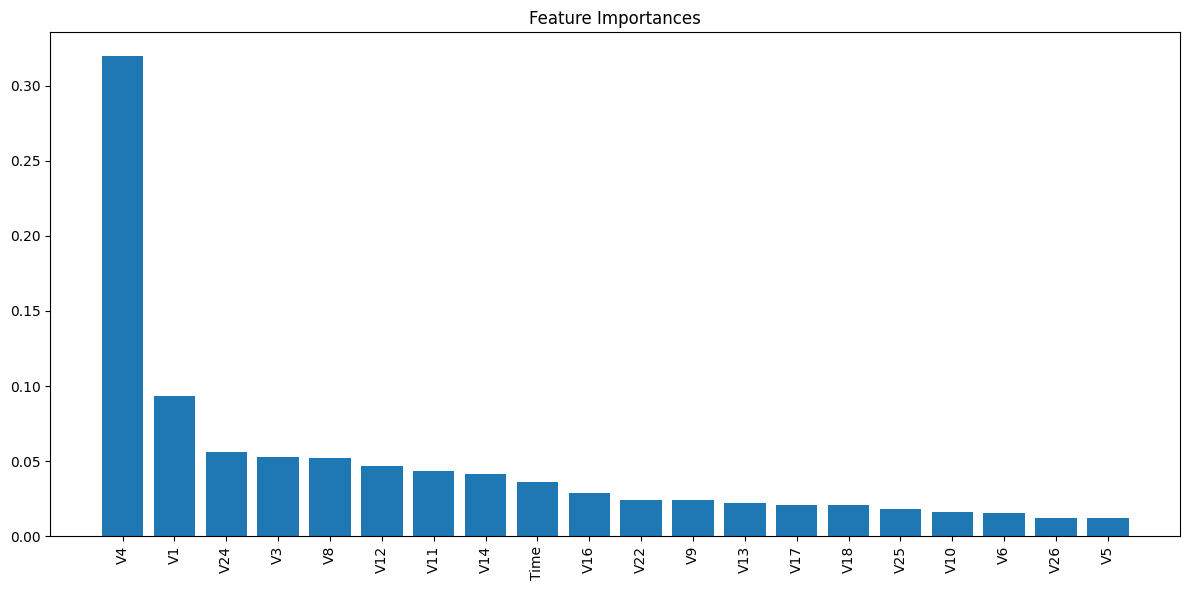

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, precision_recall_curve, 
                            average_precision_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('credit_card/creditcard.csv')

# Explore class imbalance
print("Class Distribution:\n", df['Class'].value_counts())
print("\nPercentage of Fraud Cases: {:.4f}%".format(df['Class'].mean()*100))

# Prepare features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create balanced class weights (automatically adjusts for imbalance)
class_weights = {0: 1, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}

# Build Random Forest model with handling for imbalanced data
model = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('sampling', SMOTE(sampling_strategy=0.5, random_state=42)),  # Oversample minority class
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        class_weight=class_weights,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_proba)))
print("Average Precision Score: {:.4f}".format(average_precision_score(y_test, y_proba)))

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Feature importance
importances = model.named_steps['classifier'].feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(20), importances[indices][:20], align="center")
plt.xticks(range(20), [features[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.show()